In [1]:
# Imports & Settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
     
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

# Load environment variables
from dotenv import load_dotenv
import os
from pathlib import Path

# Load .env file from current directory
env_path = Path('.env')
load_dotenv(env_path)

True

In [2]:
# Get path from environment variables
path_daily_returns_strategies = os.getenv('path_daily_returns_strategies')

# Full History for all the strategies
path = path_daily_returns_strategies

# print(f"Data file path: {path}")

In [3]:
# read csv file from path
df = pd.read_csv(path, sep=';') 

df.head()

,Date,Profit_pct_100
0,2025-01-01,0.00
1,2025-01-02,0.01
2,2025-01-03,0.02
3,2025-01-05,0.00
4,2025-01-06,-0.04


In [4]:
# df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            283 non-null    object 
 1   Profit_pct_100  283 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [5]:
# Convert the Date column to string and slice to obtain year, month, and day values
df['Year'] = df['Date'].astype(str).str.slice(0, 4).astype(int)
df['Month'] = df['Date'].astype(str).str.slice(5, 7).astype(int)
df['Day'] = df['Date'].astype(str).str.slice(8, 10).astype(int)

# drop the Date column
df.drop(columns=['Date'], inplace=True)

# Convert the Year, Month, and Day columns to a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Drop the Year, Month, and Day columns as they are no longer needed
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# rename the columns to Date and Profit (%)
df.rename(columns={'Profit_pct_100': 'Profit (%)'}, inplace=True)

# columns order
cols = ['Date', 'Profit (%)']

# Reorder the DataFrame columns
df = df[cols]

df.set_index('Date', inplace=True)

df.head()

,Profit (%)
Date,
2025-01-01,0.00
2025-01-02,0.01
2025-01-03,0.02
2025-01-05,0.00
2025-01-06,-0.04


In [6]:
# daily_returns are a series as the Profit (%) column
daily_returns = df['Profit (%)']

daily_returns.head()

Date
2025-01-01    0.00
2025-01-02    0.01
2025-01-03    0.02
2025-01-05    0.00
2025-01-06   -0.04
Name: Profit (%), dtype: float64

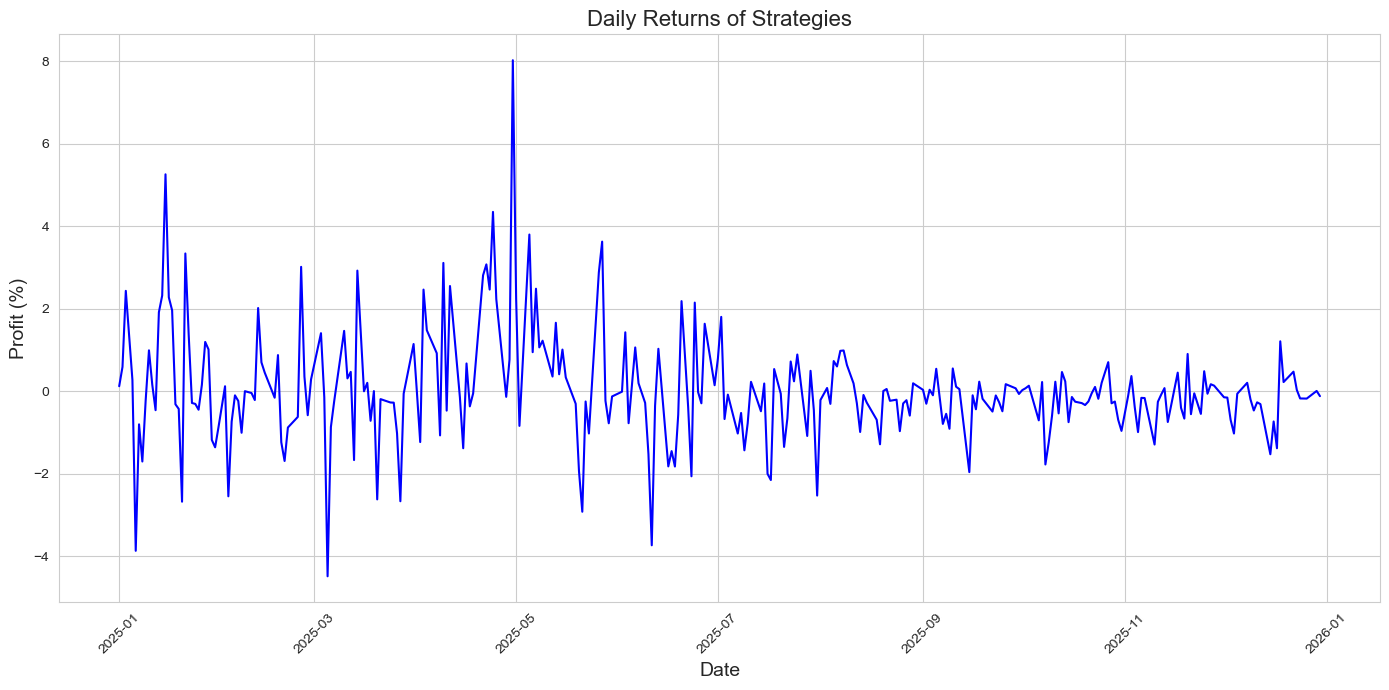

In [7]:
# plot daily_returns
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_returns*100, color='blue', linewidth=1.5)
plt.title('Daily Returns of Strategies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Profit (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Montecarlo Simulation

# Simulation parameters
num_simulations = 1000  # Number of simulations

forecast_days = 365  # Investment horizon in days
desired_return = 0.10  # Desired return (10%)

initial_investment = 100000  # Initial investment amount

# Initilize the simulation array with zeros
simulations = np.zeros((num_simulations, forecast_days))

# Simulate future path
for i in range(num_simulations):
    cumulative_returns = np.random.choice(daily_returns, size=forecast_days, replace=True).cumsum()
    simulations[i, :] = initial_investment * (1 + cumulative_returns)

print(simulations)

[[ 99933.83  99703.57 101182.23 ... 163476.54 163699.55 163646.42]
 [ 99743.66  99392.32  99079.99 ... 141980.94 143388.06 143334.93]
 [ 99714.99 100415.02 100197.68 ...  48666.76  48427.23  46605.2 ]
 ...
 [ 99834.63 101059.43  98906.33 ... 163023.25 161997.82 161281.2 ]
 [ 98975.89  98483.07  98618.31 ...  96337.88  96276.99  95791.1 ]
 [100731.18  96996.08  95704.17 ...  86958.    86810.7   87033.1 ]]


In [9]:
type(simulations)

numpy.ndarray

In [10]:
simulations.shape

(1000, 365)

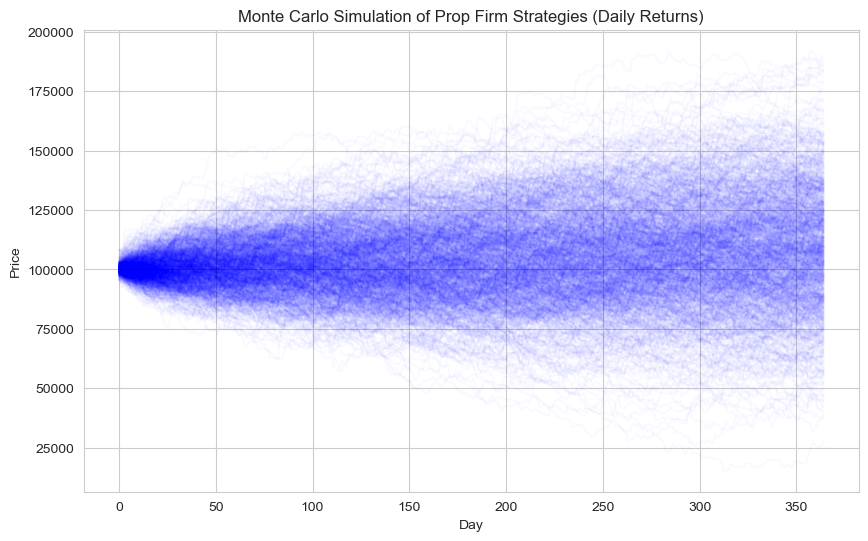

In [11]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, color="blue", alpha=0.025)
plt.title("Monte Carlo Simulation of Prop Firm Strategies (Daily Returns)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [12]:
# Calculate the average daily return
average_daily_return = daily_returns.mean()

# Calculate volatility as the standard deviation of daily returns
volatility = daily_returns.std()

print(f"Average Daily Return: {average_daily_return}")
print(f"Volatility: {volatility}")

Average Daily Return: 0.00022844946996466908
Volatility: 0.013455402561576096


In [13]:
# Simulating future returns
simulated_end_returns = np.zeros(num_simulations)
for i in range(num_simulations):
    random_returns = np.random.normal(average_daily_return, volatility, forecast_days)
    cumulative_return = np.prod(1 + random_returns)
    simulated_end_returns[i] = initial_investment * cumulative_return

# Calculate the final investment values
final_investment_values = simulated_end_returns

print(final_investment_values)

[ 85375.95086132  81933.95415039 106571.8016993  110457.90001587
 160261.99754858 114953.19783606 117208.87451445 102441.01623627
  84460.77558082 131757.44405543 126852.19684117 116606.26590589
  84663.39896157  84883.282698    83201.91891483 108404.8005554
 118883.117508   100847.68578259 147873.10509243 139005.52151574
 126024.17938654  98039.43203821 111095.65335287 145147.92290657
  91988.0165646  116014.03332763 117257.01357682  75622.03379917
 121342.76324134 160519.94871193 107543.97390114 142561.61256494
 175908.10322023 197615.15634621  96122.85491504 143788.60814575
 107112.05494394  86410.58194603  70474.59392174 177019.58009699
 140431.83035958  85648.26642916  92392.40014987 102490.69785901
 121619.87315841  89936.69914848  89352.60003687  61526.29798928
  77422.84095742  59386.78807745  61584.73218413 132363.11527122
 121958.24279873 119507.63611288  74692.42746335 112522.81746167
 124556.76446    123710.14006831  93202.07126904 112065.68057208
 111215.21140226 119501.89

In [14]:
confidence_level = 0.95
sorted_returns = np.sort(final_investment_values)
index_at_var = int((1-confidence_level) * num_simulations)
var = initial_investment - sorted_returns[index_at_var]
conditional_var = initial_investment - sorted_returns[:index_at_var].mean()

print(f"Value at Risk (95% confidence): ${var:,.2f}")
print(f"Expected Tail Loss (Conditional VaR): ${conditional_var:,.2f}")

Value at Risk (95% confidence): $31,592.53
Expected Tail Loss (Conditional VaR): $38,751.09


In [15]:
desired_return = 0.10  # Desired return

num_success = np.sum(final_investment_values >= initial_investment * (1 + desired_return))
probability_of_success = num_success / num_simulations

print(f"Probability of achieving at least a {desired_return*100}% return: {probability_of_success*100:.2f}%")

Probability of achieving at least a 10.0% return: 44.20%


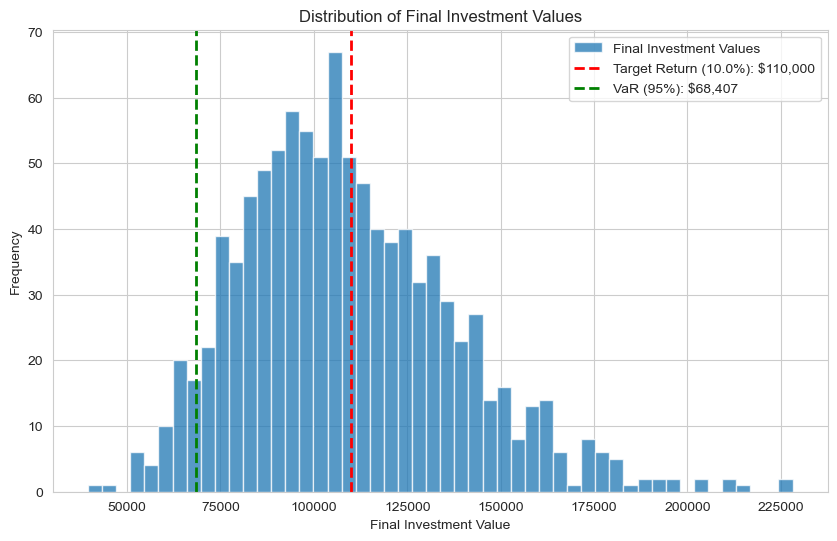

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(final_investment_values, bins=50, alpha=0.75, label='Final Investment Values')
plt.axvline(
    initial_investment * (1 + desired_return),
    color="r",
    linestyle="dashed",
    linewidth=2,
    label=f'Target Return ({desired_return*100}%): ${initial_investment * (1 + desired_return):,.0f}'
)
plt.axvline(initial_investment - var, color="g", linestyle="dashed", linewidth=2, 
           label=f'VaR (95%): ${initial_investment - var:,.0f}')
plt.title("Distribution of Final Investment Values")
plt.xlabel("Final Investment Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()